In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
cols = df.columns[:-1]
print (X.shape)
print (y.shape)

(614, 9)
(614,)


In [6]:
X

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,316,2,112,68,22,94,34.1,0.315,26
1,25,11,143,94,33,146,36.6,0.254,51
2,710,2,93,64,32,160,38.0,0.674,23
3,658,1,120,80,48,200,38.9,1.162,41
4,542,3,128,72,25,190,32.4,0.549,27
...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59
610,555,1,84,64,23,115,36.9,0.471,28
611,730,2,92,52,0,0,30.1,0.141,22
612,103,0,125,96,0,0,22.5,0.262,21


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.410691  , 0.11764706, 0.56852792, ..., 0.57407407, 0.10119556,
        0.08333333],
       [0.03129074, 0.64705882, 0.72588832, ..., 0.61616162, 0.07514944,
        0.5       ],
       [0.9243807 , 0.11764706, 0.47208122, ..., 0.63973064, 0.25448335,
        0.03333333],
       ...,
       [0.95045632, 0.11764706, 0.46700508, ..., 0.50673401, 0.02690009,
        0.01666667],
       [0.13298566, 0.        , 0.63451777, ..., 0.37878788, 0.07856533,
        0.        ],
       [0.78487614, 0.05882353, 0.62944162, ..., 0.46801347, 0.00939368,
        0.15      ]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((552, 9), (62, 9), (552,), (62,))

# Constructing a Weak Learner

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

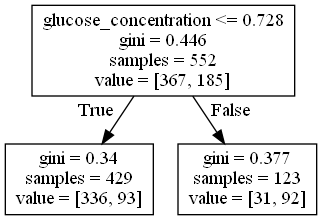

In [11]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(clf, feature_names=cols)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## No-Randomness

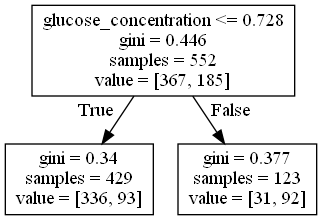

In [15]:
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, feature_names=cols)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Adaboost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
base = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_ada = AdaBoostClassifier(base_estimator = base, n_estimators=10)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

In [18]:
model_ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=2000230647),
 DecisionTreeClassifier(max_depth=1, random_state=153651484),
 DecisionTreeClassifier(max_depth=1, random_state=915274483),
 DecisionTreeClassifier(max_depth=1, random_state=1920131070),
 DecisionTreeClassifier(max_depth=1, random_state=1045201622),
 DecisionTreeClassifier(max_depth=1, random_state=2014592467),
 DecisionTreeClassifier(max_depth=1, random_state=1514372877),
 DecisionTreeClassifier(max_depth=1, random_state=797045522),
 DecisionTreeClassifier(max_depth=1, random_state=716188255),
 DecisionTreeClassifier(max_depth=1, random_state=638597025)]

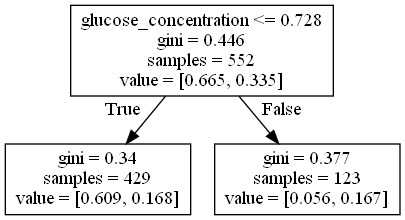

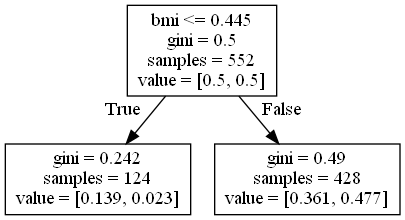

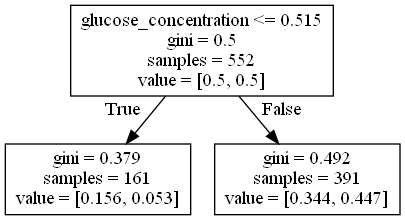

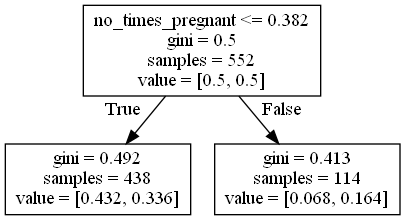

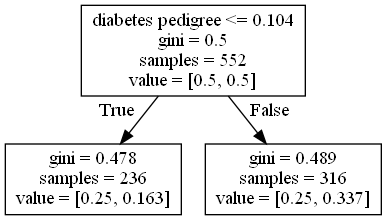

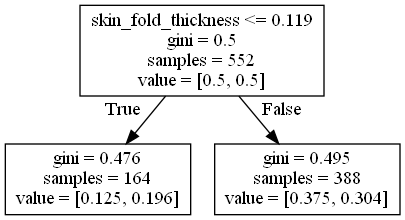

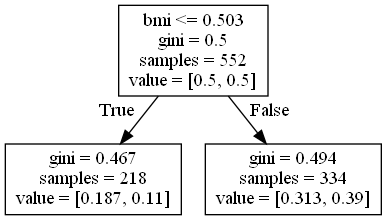

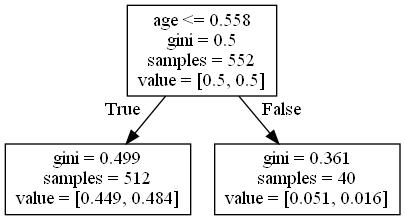

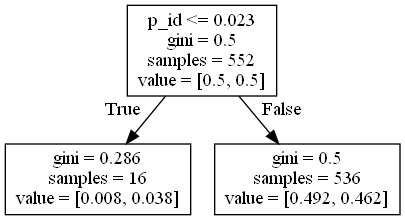

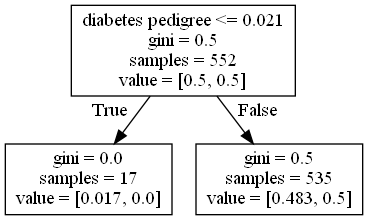

In [20]:
for estimator in model_ada.estimators_:
    dot_data = export_graphviz(estimator, feature_names=cols)
    graph = pydotplus.graph_from_dot_data(dot_data)
    img = Image(graph.create_png())
    display(img)

In [21]:
y_pred = model_ada.predict(X_test)

## Feature Importance

In [23]:
cols

Index(['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'],
      dtype='object')

In [22]:
model_ada.feature_importances_

array([0.1, 0.1, 0.2, 0. , 0.1, 0. , 0.2, 0.2, 0.1])

<AxesSubplot:>

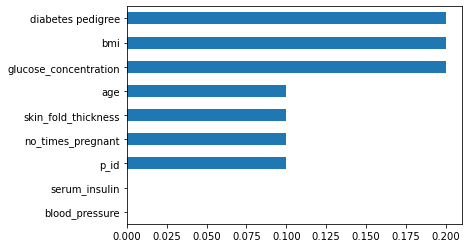

In [25]:
pd.Series(model_ada.feature_importances_, index=cols).sort_values().plot(kind='barh')

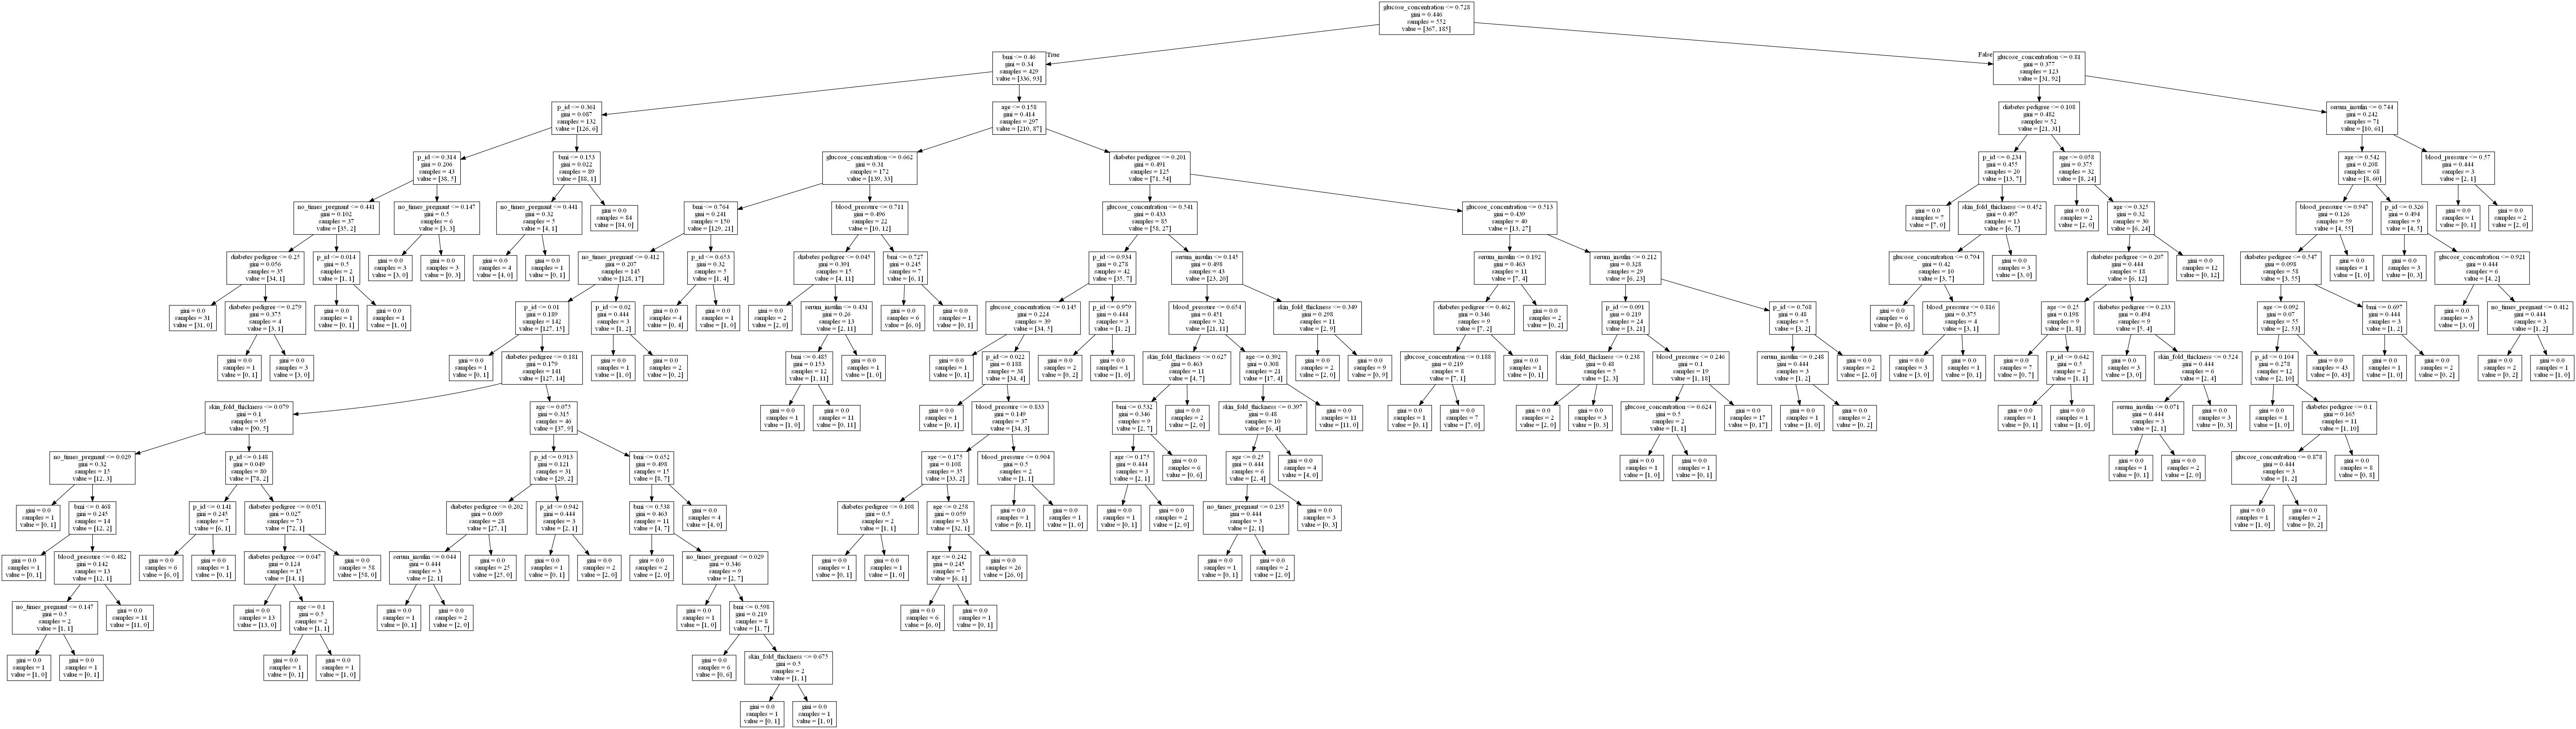

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=20)
clf.fit(X_train, y_train)
dot_data = export_graphviz(clf, feature_names=cols)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

<AxesSubplot:>

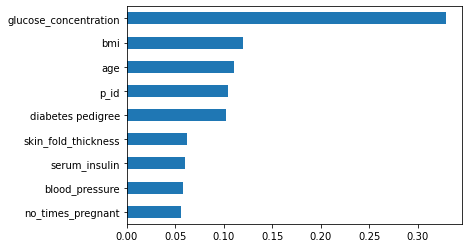

In [28]:
pd.Series(clf.feature_importances_, index=cols).sort_values().plot(kind='barh')